In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch

,ID,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
0,6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
1,6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
2,6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
3,6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
4,6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
4586,20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
4587,20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7
4588,20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0


In [3]:
len(df_allmatch[df_allmatch["W/L"]==0])/len(df_allmatch)

0.23485838779956428

In [4]:
df_allmatch=df_allmatch[df_allmatch["Year"]>=2013]
df_allmatch

,ID,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
2142,13010512,2013,1,2013-03-02,yokohama-fa-marinos,shonan-bellmare,5,12,4,2,1,日産ス,24298,1550,1312,0,0
2143,13010813,2013,1,2013-03-02,nagoya-grampus-eight,jubilo-iwata,8,13,1,1,0,豊田ス,21748,1578,1481,0,0
2144,13013301,2013,1,2013-03-02,sagan-tosu,kashima-antlers,33,1,1,1,0,ベアスタ,12728,1470,1537,0,0
2145,13012078,2013,1,2013-03-02,cerezo-osaka,albirex-niigata,20,78,1,0,1,長居,15051,1490,1477,0,0
2146,13015428,2013,1,2013-03-02,vegalta-sendai,ventforet-kofu,54,28,1,1,0,ユアスタ,16353,1538,1398,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
4586,20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
4587,20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7
4588,20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0


In [5]:
true_count = 0
for index,row in df_allmatch.iterrows():
    if  (row["HomeRate"]>row["AwayRate"] and row["W/L"] == 1):
        true_count += 1
            
    elif (row["AwayRate"]>row["HomeRate"] and row["W/L"] == 2 ):
        true_count += 1
        
    elif (row["HomeRate"] == row["AwayRate"] and row["W/L"] ==0):
        true_count += 1

In [6]:
true_count

1158

In [7]:
true_count / len(df_allmatch)

0.4730392156862745

In [8]:
df_allmatch_not0=df_allmatch[df_allmatch["W/L"]!=0]

In [9]:
true_count = 0
for index,row in df_allmatch_not0.iterrows():
    if  (row["HomeRate"]>row["AwayRate"] and row["W/L"] == 1):
        true_count += 1
            
    elif (row["AwayRate"]>row["HomeRate"] and row["W/L"] == 2 ):
        true_count += 1
        
    elif (row["HomeRate"] == row["AwayRate"] and row["W/L"] ==0):
        true_count += 1

In [10]:
true_count / len(df_allmatch_not0)

0.6156716417910447

### 考察 

単純にイロレーティングの大小で勝敗を判断すると13-20年で47%の的中率になる｡
この手法だと全試合の20-25%ほどある引き分け試合を全く当てることは出来ないので､それも大きく響いている｡

引き分け試合を除外すると61%の的中率になる｡


---

EloRatingの差分から勝率を換算して､totoで検証してみる

In [11]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv", index_col="ID")
df_allmatch

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
ID,,,,,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7


In [12]:
df = df_allmatch[["Year","Date","Home","Away","HomeGF","AwayGF","W/L","HomeRate","AwayRate"]]
df

,Year,Date,Home,Away,HomeGF,AwayGF,W/L,HomeRate,AwayRate
ID,,,,,,,,,
6010903,2006,2006-03-04,gamba-osaka,urawa-red-diamonds,1,1,0,1500,1500
6012807,2006,2006-03-05,ventforet-kofu,shimizu-s-pulse,0,2,2,1500,1500
6012231,2006,2006-03-05,fc-tokyo,oita-trinita,2,0,1,1500,1500
6011323,2006,2006-03-05,jubilo-iwata,avispa-fukuoka,1,1,0,1500,1500
6010820,2006,2006-03-05,nagoya-grampus-eight,cerezo-osaka,3,2,1,1500,1500
...,...,...,...,...,...,...,...,...,...
20340120,2020,2020-12-19,kashima-antlers,cerezo-osaka,1,1,0,1594,1560
20340810,2020,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,1,0,1,1515,1524
20343331,2020,2020-12-19,sagan-tosu,oita-trinita,2,2,0,1453,1458


In [13]:
print("シーズンごとの引き分け試合の割合")
for y in range(2006,2021):
    df_y = df[df["Year"] == y]
    d_rate = len(df_y[df_y["W/L"]==0])/len(df_y)
    print(f"{y}年 {d_rate}")

シーズンごとの引き分け試合の割合
2006年 0.19934640522875818
2007年 0.20915032679738563
2008年 0.22875816993464052
2009年 0.26143790849673204
2010年 0.26143790849673204
2011年 0.24509803921568626
2012年 0.24836601307189543
2013年 0.2222222222222222
2014年 0.25163398692810457
2015年 0.24509803921568626
2016年 0.22875816993464052
2017年 0.238562091503268
2018年 0.22549019607843138
2019年 0.23529411764705882
2020年 0.2222222222222222


In [14]:
len(df[df["W/L"] == 0])/len(df)

0.23485838779956428

引き分け試合の割合が06-20で23.4%,各シーズンでもおよそ20-26%ぐらい

そこで全試合､23.5%の引き分け確率があると仮定して､EloRatingから勝率を換算する｡

In [15]:
# win_rate = 1 /(1+pow(10, rate_diff*(-1)/400) )*0.765 
# loss_rate = 1/ (1+pow(10, rate_diff/400) )*0.765
# draw_rate = 0.235

In [16]:
df.insert(9,"WinRate",np.nan)
df.insert(10,"LossRate",np.nan)
df.insert(11,"DrawRate",np.nan)

In [17]:
df

,Year,Date,Home,Away,HomeGF,AwayGF,W/L,HomeRate,AwayRate,WinRate,LossRate,DrawRate
ID,,,,,,,,,,,,
6010903,2006,2006-03-04,gamba-osaka,urawa-red-diamonds,1,1,0,1500,1500,NaN,NaN,NaN
6012807,2006,2006-03-05,ventforet-kofu,shimizu-s-pulse,0,2,2,1500,1500,NaN,NaN,NaN
6012231,2006,2006-03-05,fc-tokyo,oita-trinita,2,0,1,1500,1500,NaN,NaN,NaN
6011323,2006,2006-03-05,jubilo-iwata,avispa-fukuoka,1,1,0,1500,1500,NaN,NaN,NaN
6010820,2006,2006-03-05,nagoya-grampus-eight,cerezo-osaka,3,2,1,1500,1500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,2020-12-19,kashima-antlers,cerezo-osaka,1,1,0,1594,1560,NaN,NaN,NaN
20340810,2020,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,1,0,1,1515,1524,NaN,NaN,NaN
20343331,2020,2020-12-19,sagan-tosu,oita-trinita,2,2,0,1453,1458,NaN,NaN,NaN


In [18]:
for index,row in df.iterrows():
    rate_diff = row["HomeRate"]-row["AwayRate"]
    
    win_rate = 1 /(1+pow(10, rate_diff*(-1)/400) )*0.765 
    loss_rate = 1/ (1+pow(10, rate_diff/400) )*0.765
    draw_rate = 0.235
    
    df.at[index,"WinRate"] = win_rate
    df.at[index,"LossRate"] = loss_rate
    df.at[index,"DrawRate"] = draw_rate

In [19]:
df

,Year,Date,Home,Away,HomeGF,AwayGF,W/L,HomeRate,AwayRate,WinRate,LossRate,DrawRate
ID,,,,,,,,,,,,
6010903,2006,2006-03-04,gamba-osaka,urawa-red-diamonds,1,1,0,1500,1500,0.382500,0.382500,0.235
6012807,2006,2006-03-05,ventforet-kofu,shimizu-s-pulse,0,2,2,1500,1500,0.382500,0.382500,0.235
6012231,2006,2006-03-05,fc-tokyo,oita-trinita,2,0,1,1500,1500,0.382500,0.382500,0.235
6011323,2006,2006-03-05,jubilo-iwata,avispa-fukuoka,1,1,0,1500,1500,0.382500,0.382500,0.235
6010820,2006,2006-03-05,nagoya-grampus-eight,cerezo-osaka,3,2,1,1500,1500,0.382500,0.382500,0.235
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,2020-12-19,kashima-antlers,cerezo-osaka,1,1,0,1594,1560,0.419812,0.345188,0.235
20340810,2020,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,1,0,1,1515,1524,0.372594,0.392406,0.235
20343331,2020,2020-12-19,sagan-tosu,oita-trinita,2,2,0,1453,1458,0.376996,0.388004,0.235


In [20]:
df_price =  pd.DataFrame([[100,300,900,2700,8100,24300],[200,600,1800,5400,16200],[400,1200,3600,10800],[800,2400,7200],[1600,4800],[3200]], columns=['t_0','t_1','t_2','t_3','t_4','t_5'], index = ['d_0','d_1','d_2','d_3','d_4','d_5'])
pay_back_rates = 0

for year in range(2013,2021):

    df_toto = pd.read_csv(f"./toto_data/{year}.csv", header=[0,1], index_col=[0,1])
    df_toto.rename(columns={'Unnamed: 2_level_1':'','Unnamed: 3_level_1':''}, level=1, inplace=True)
    df_rate = df
    #     df_pred = pd.read_csv(f"./predict_proba_data/{year}.csv", index_col=0)
    
    total_amount = 0
    total_profit = 0
    total_winning = 0
    for index,row in df_toto.iterrows():

        amount = 0
        d_count = 0
        t_count = 0

        buy_lots = []

        for i in range(1,6):
            m_id = row[(f"Match{i}","MatchID")] # これを引数で関数化する
            rate = df_rate.loc[m_id]

            # 買い方を返す
            buy_lot = []
            if rate["WinRate"] - rate["LossRate"] > 0.05:
                buy_lot = [1]
            elif rate["WinRate"] - rate["LossRate"]  > -0.05:
                buy_lot = [0,1,2]
                t_count += 1
            else:
                buy_lot = [2]

            buy_lots.append(buy_lot)


        amount = int(df_price.iloc[d_count,t_count])

        # 実際に買っていたときの結果を出力
        winning = row[("Winning","")]
        is_winning = True
        for i in range(1,6):
            m_wl = row[(f"Match{i}","W/L")]
            if not m_wl in buy_lots[i-1]:
                is_winning = False


        if is_winning:
            profit = winning - amount
            total_winning += winning
        else:
            profit = amount * (-1)

        total_amount += amount
        total_profit += profit
        pay_back_rate = total_winning / total_amount



    print(f"{year}年 総購入金額 : {total_amount}円 総利益 : {total_profit}円 回収率 : {pay_back_rate:.02}") 
    pay_back_rates += pay_back_rate

print(f"平均回収率 {pay_back_rates/8:.02}")

2013年 総購入金額 : 26600円 総利益 : -24838円 回収率 : 0.066
2014年 総購入金額 : 14400円 総利益 : 1068円 回収率 : 1.1
2015年 総購入金額 : 11600円 総利益 : 5114円 回収率 : 1.4
2016年 総購入金額 : 6800円 総利益 : -6060円 回収率 : 0.11
2017年 総購入金額 : 7600円 総利益 : -6312円 回収率 : 0.17
2018年 総購入金額 : 12900円 総利益 : -6534円 回収率 : 0.49
2019年 総購入金額 : 11800円 総利益 : -10341円 回収率 : 0.12
2020年 総購入金額 : 10400円 総利益 : 4071円 回収率 : 1.4
平均回収率 0.61


In [21]:
wins = []
losses = []
draws = []

for index,row in df[df["Year"] > 2010].iterrows():
    if row["W/L"] == 1:
        wins.append(row["WinRate"])
    elif row["W/L"] == 2:
        losses.append(row["WinRate"])
    elif row["W/L"] == 0:
        draws.append(row["WinRate"])
        

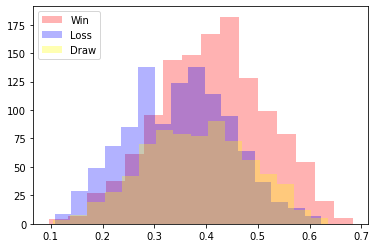

In [22]:
plt.hist(wins, color="red", alpha=0.3, label = 'Win' ,bins=16)
plt.hist(losses, color="blue", alpha=0.3, label = 'Loss',bins=16)
plt.hist(draws, color="Yellow" ,alpha=0.3, label = 'Draw',bins=16)
plt.legend(loc='upper left')

### 勝敗予測 考察

山が3つに別れてほしかったが､うまく別れていないので､うまく行かなそう､､､､｡

### toto予測 考察

06-20年の引き分け試合の割合が23.5%程だったことから､全試合で一定の23.5%引き分けとして予測して､残りはEloRatingから勝率を算出した｡
機械学習で出したものとは結構異なったが,的中率は47%ぐらい､totoではシングルとトリプルの閾値を±0.05とした時､回収率0.61まで持っていくことが出来た｡

機械学習で予測した結果と､精度面ではさほど変わらなかった｡

In [23]:
df_rate = pd.read_csv("./elorating.csv")
df_rate["date"] = pd.to_datetime(df_rate["date"])
df_rate = df_rate.set_index("date").astype(int)
df_rate

,kashima-antlers,jef-united,urawa-red-diamonds,tokyo-verdy,yokohama-fa-marinos,yokohama-flugels,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,...,ventforet-kofu,montedio-yamagata,oita-trinita,sagan-tosu,yokohama-fc,tokushima-vortis,matsumoto-yamaga,v-varen-nagasaki,vegalta-sendai,albirex-niigata
date,,,,,,,,,,,,,,,,,,,,,
2006-02-04,1500,1500,1500,1380,1500,1380,1500,1500,1500,1500,...,1500,1380,1500,1380,1380,1380,1380,1380,1380,1500
2006-02-05,1500,1500,1500,1380,1500,1380,1500,1500,1500,1500,...,1500,1380,1500,1380,1380,1380,1380,1380,1380,1500
2006-02-06,1500,1500,1500,1380,1500,1380,1500,1500,1500,1500,...,1500,1380,1500,1380,1380,1380,1380,1380,1380,1500
2006-02-07,1500,1500,1500,1380,1500,1380,1500,1500,1500,1500,...,1500,1380,1500,1380,1380,1380,1380,1380,1380,1500
2006-02-08,1500,1500,1500,1380,1500,1380,1500,1500,1500,1500,...,1500,1380,1500,1380,1380,1380,1380,1380,1380,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,1594,1406,1489,1397,1543,1380,1407,1514,1577,1532,...,1416,1355,1451,1442,1346,1321,1387,1378,1409,1407
2020-12-17,1594,1406,1485,1397,1543,1380,1399,1514,1581,1524,...,1416,1355,1457,1453,1343,1321,1387,1378,1417,1407
2020-12-18,1594,1406,1485,1397,1543,1380,1399,1514,1581,1524,...,1416,1355,1457,1453,1343,1321,1387,1378,1417,1407


<AxesSubplot:title={'center':'Ratings from 2006 to 2020'}, xlabel='date'>

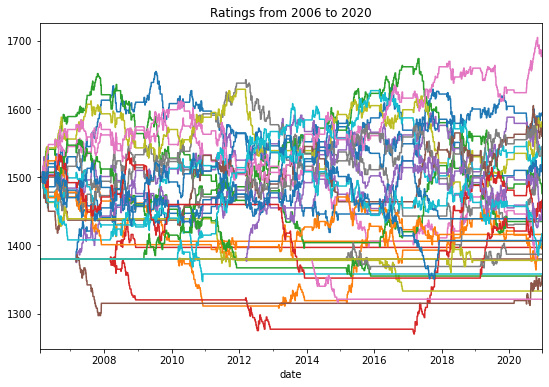

In [24]:
clubs = df_rate.columns
dates = df_rate.index
df_rate.plot(figsize=(9,6),legend=False,title="Ratings from 2006 to 2020")

<AxesSubplot:title={'center':'Ratings for J1 teams from 2020-08 to 2020-12'}, xlabel='date'>

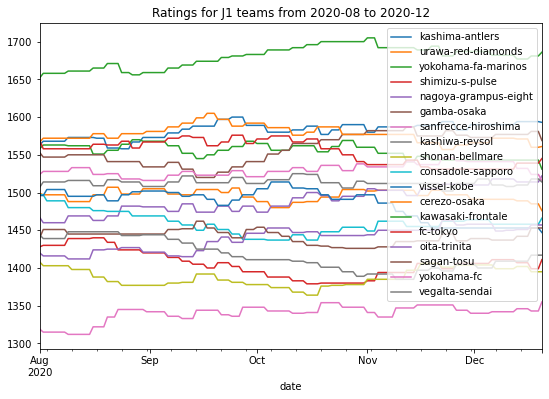

In [25]:
clubs_2020=['kashima-antlers', 'urawa-red-diamonds', 'yokohama-fa-marinos','shimizu-s-pulse',
'nagoya-grampus-eight', 'gamba-osaka', 'sanfrecce-hiroshima','kashiwa-reysol',
 'shonan-bellmare','consadole-sapporo', 'vissel-kobe', 'cerezo-osaka', 
 'kawasaki-frontale','fc-tokyo', 'oita-trinita', 'sagan-tosu','yokohama-fc', 'vegalta-sendai']

df_rate["2020-8":"2020-12"][clubs_2020].plot(figsize=(9,6), title="Ratings for J1 teams from 2020-08 to 2020-12")

In [26]:
pd.DataFrame(df_rate[clubs_2020].iloc[-1].sort_values(ascending=False))

,2020-12-20
kawasaki-frontale,1686
kashima-antlers,1593
gamba-osaka,1569
cerezo-osaka,1561
fc-tokyo,1545
yokohama-fa-marinos,1531
nagoya-grampus-eight,1522
sanfrecce-hiroshima,1516
kashiwa-reysol,1514
urawa-red-diamonds,1476


In [29]:
clubs_2006 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka', 'sanfrecce-hiroshima',  'jubilo-iwata',  'cerezo-osaka', 
     'kawasaki-frontale', 'fc-tokyo', 'avispa-fukuoka', 'kyoto-sanga', 
     'omiya-ardija', 'ventforet-kofu',  'oita-trinita','albirex-niigata'
]

clubs_2007 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka', 'sanfrecce-hiroshima',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija', 'ventforet-kofu',  'oita-trinita','albirex-niigata',
    'vissel-kobe','kashiwa-reysol','yokohama-fc',
]

clubs_2008 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija',   'oita-trinita','albirex-niigata',
    'vissel-kobe','kashiwa-reysol',
     'consadole-sapporo',  'tokyo-verdy','kyoto-sanga',
]

clubs_2009 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija',   'oita-trinita','albirex-niigata',
    'vissel-kobe','kashiwa-reysol',
     'kyoto-sanga','sanfrecce-hiroshima', 'montedio-yamagata',
]

clubs_2010 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija',   'albirex-niigata',
    'vissel-kobe',
     'kyoto-sanga','sanfrecce-hiroshima', 'montedio-yamagata',
     'vegalta-sendai', 'cerezo-osaka', 'shonan-bellmare',
]

clubs_2011 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata',
    'vissel-kobe',
     'sanfrecce-hiroshima', 'montedio-yamagata',
     'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol', 'ventforet-kofu', 'avispa-fukuoka',
]

clubs_2012 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata','vissel-kobe',
     'sanfrecce-hiroshima', 'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol',  'fc-tokyo', 'sagan-tosu', 'consadole-sapporo',
]

clubs_2013 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
    'jubilo-iwata',  'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata',
     'sanfrecce-hiroshima', 'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol',  'fc-tokyo', 'sagan-tosu', 
     'ventforet-kofu', 'shonan-bellmare', 'oita-trinita',
]

clubs_2014 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata',
     'sanfrecce-hiroshima', 'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol',  'fc-tokyo', 'sagan-tosu', 
     'ventforet-kofu',   'gamba-osaka', 'vissel-kobe', 'tokushima-vortis',
]

clubs_2015 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
    'shimizu-s-pulse', 'nagoya-grampus-eight', 'kawasaki-frontale',
    'albirex-niigata','sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu', 'ventforet-kofu', 'gamba-osaka', 
    'vissel-kobe', 'shonan-bellmare', 'matsumoto-yamaga', 'montedio-yamagata',
]

clubs_2016 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
    'nagoya-grampus-eight', 'kawasaki-frontale',
    'albirex-niigata','sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu', 'ventforet-kofu', 'gamba-osaka', 
    'vissel-kobe', 'shonan-bellmare', 
    'omiya-ardija', 'jubilo-iwata', 'avispa-fukuoka',
]

clubs_2017 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale',
    'albirex-niigata','sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu', 'ventforet-kofu', 'gamba-osaka', 
    'vissel-kobe','omiya-ardija', 'jubilo-iwata', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
]

clubs_2018 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale',
    'sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 
    'vissel-kobe', 'jubilo-iwata', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
     'shonan-bellmare', 'v-varen-nagasaki', 'nagoya-grampus-eight',
]

clubs_2019 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale',
    'sanfrecce-hiroshima', 'vegalta-sendai',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 
    'vissel-kobe', 'jubilo-iwata', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
     'shonan-bellmare',  'nagoya-grampus-eight',
     'matsumoto-yamaga', 'oita-trinita',
]

clubs_2020 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale','sanfrecce-hiroshima', 'vegalta-sendai',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 'vissel-kobe', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
     'shonan-bellmare',  'nagoya-grampus-eight',
      'oita-trinita', 'kashiwa-reysol', 'yokohama-fc',
]

In [31]:
df_rate[clubs_2006].loc["2006-12-20"].sort_values(ascending=False)

urawa-red-diamonds      1589
kawasaki-frontale       1570
gamba-osaka             1556
jubilo-iwata            1547
shimizu-s-pulse         1545
kashima-antlers         1530
nagoya-grampus-eight    1516
sanfrecce-hiroshima     1499
oita-trinita            1492
yokohama-fa-marinos     1484
omiya-ardija            1481
ventforet-kofu          1478
fc-tokyo                1477
jef-united              1471
albirex-niigata         1470
avispa-fukuoka          1439
cerezo-osaka            1437
kyoto-sanga             1408
Name: 2006-12-20 00:00:00, dtype: int64